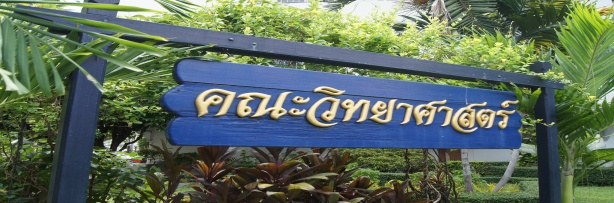

### <span style='color:lightgreen;'>Inter-Mean Algorithm</span>
The inter-mean algorithm, also known as the intermeans or iterative mean thresholding algorithm, is a method used in image processing for segmenting an image into foreground and background by determining an optimal threshold value. This threshold is determined by iteratively calculating the mean of the pixels on either side of a guessed threshold and then averaging these means to get a new threshold. This process is repeated until convergence, where the threshold no longer changes significantly.

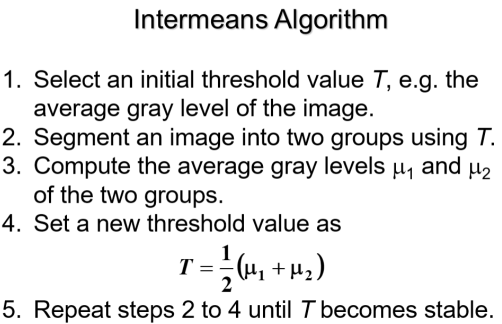


Here's a more detailed explanation:




#### <span style='color:lightblue;'>All Processes in Python</span>  
1. **<span style='color:lightgreen;'>Import Libraries and define functions</span>**
    - Import the necessary libraries and define custom function.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i, j]]+=1
    return np.array(hist)

In [18]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col*scale), int(row*scale))
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

2. **<span style='color:lightgreen;'>Read an Image</span>**
    - Load and resize an image using OpenCV.

In [4]:
img = cv2.imread('./images/gray2.png', 0)
print(img.shape)

(512, 512)


In [20]:
#img = ResizeImage(img, 0.5)
#print(img.shape)

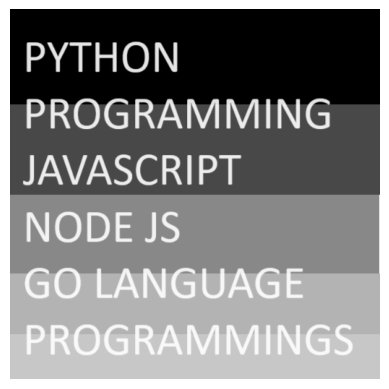

In [5]:
ShowImage(img)

3. **<span style='color:lightgreen;'>Calculate Histogram</span>**
    - Compute the histogram of the image.

In [6]:
hist = histogram(img)

4. **<span style='color:lightgreen;'>Plot Histogram</span>**
    - Use Matplotlib to display the histogram.

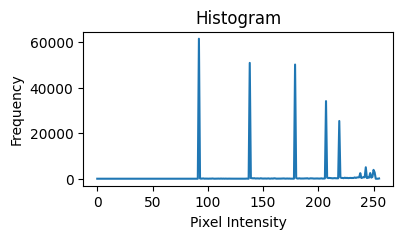

In [7]:
def show_histogram(h, opt):
    plt.figure(figsize=(4,2))
    plt.plot(h)
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    if opt:
        plt.axis("on")
    else:
        plt.axis("off")
    plt.show()
# plt.savefig('histogram.png')
show_histogram(hist, 1)

5. **<span style='color:lightgreen;'>Calculate Threshoding Value by Intermean Algorithm</span>**

In [9]:
def intermean_org(hist, t):
    prob = hist/np.sum(hist)
    
    w0 = np.sum(prob[:t]) + 0.00000001
    w1 = np.sum(prob[t:]) + 0.00000001
    
    u0 = np.sum(np.array([i for i in range(t)])*prob[:t])/w0
    u1 = np.sum(np.array([i for i in range(t,256)])*prob[t:])/w1
    if (u0 == 0.0):
        thr = u1
    elif (u1 == 0.0):
        thr = u0
    else:
        thr = (u0 +u1) / 2

    return thr.astype('int16')

In [8]:
def intermean(hist, t, st, en):
    prob = np.zeros_like(hist, dtype='float16')
    tot = np.sum(hist[st:en])
    prob[st:en] = hist[st:en]/tot
    
    w0 = np.sum(prob[st:t]) + 0.0000001
    w1 = (1 - w0) +  + 0.0000001
    
    t0 = np.array([i for i in range(st,t)])
    t1 = np.array([i for i in range(t, en)])
    u0 = np.sum(t0*prob[st:t])/w0
    u1 = np.sum(t1*prob[t:en])/w1
    
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    
    return thr.astype('int16')

 - **<span style='color:lightgreen;'>Main Process</span>**

In [10]:
#T0 = 28
T0 = int(np.mean(img))
flag = True
Tlist = []
Tlist.append(T0)
while (flag):
    T1 = intermean_org(hist, T0)
    Tlist.append(T1)
    if (math.fabs(T1 -T0) < 1):
        flag = False
    else:
        T0 = T1
print(Tlist)

[164, 159, 159]


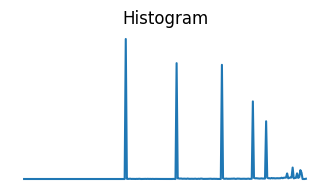

[128, 139, 158, 159, 159] 159


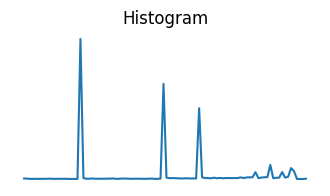

[208, 210, 210] 210


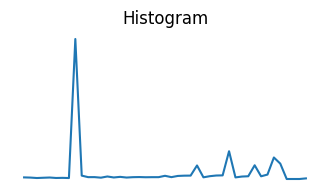

[233, 232, 231, 231] 231


In [12]:
tolerant, times = 1, 3
st, en = 0, 256
for t in range(times):
    T0 = int((st+en)*0.5)
    flag = True
    Tlist = []
    Tlist.append(T0)
    show_histogram(hist[st:en], 0)
    while(flag):
        T1 = intermean(hist, T0, st, en)
        Tlist.append(T1)
        if abs(T1-T0) < tolerant :
            flag = False
        else:
            T0 = T1
    thr = Tlist[-1]
    st = thr+1
    print(Tlist, thr)
    

In [28]:
Thresh = Tlist[-1]
print(Thresh)

231


 - **<span style='color:lightgreen;'>Theshold Step </span>**

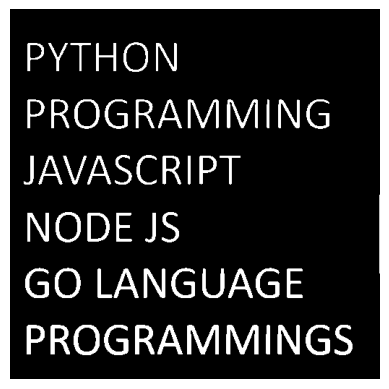

In [29]:
ret, bimg_2 = cv2.threshold(img, Thresh, 255, cv2.THRESH_BINARY)
ShowImage(bimg_2)